In [403]:
# !pip install deepface
# !pip install retina-face

In [404]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [405]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


In [406]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from os import listdir
from deepface import DeepFace
from retinaface import RetinaFace

In [408]:
folder='AnggotaKelas/'
database = []
model = ['VGG-Face', 'OpenFace', 'Facenet', 'FbDeepFace']
i = 2

for filename in listdir(folder):
    path = folder + filename
    number = DeepFace.represent(path, model_name=model[i], align=False,
                                enforce_detection = True)
    number = np.array(number)
    data = [path, number]
    database.append(data)

In [409]:
def mencocokan_wajah(img_path):
  index = 0
  prediksi = 0
  jarak = 10
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], align=False))
  for db in database:
    pic1 = database[index][1]
    distance_vector = np.square(pic1 - pic2)
    distance = np.sqrt(distance_vector.sum())
    hasil.append([database[index][0],distance])
    if(distance < jarak ):
        prediksi = index
        jarak = distance
    index += 1
  return prediksi, jarak, hasil

In [410]:
def mencocokan_wajah_cosine(img_path):
  index = 0
  prediksi = 0
  jarak = 0
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], 
                                     align=False,
                                     enforce_detection = True))
  for db in database:
    pic1 = database[index][1]
    distance_vector = np.square(pic1 - pic2)
    distance = cosine_similarity(pic1.reshape(1,-1),pic2.reshape(1,-1))
    hasil.append([database[index][0],distance])
    if(distance > jarak ):
        prediksi = index
        jarak = distance
    index += 1
  return prediksi, jarak, hasil

In [411]:
def mencari_wajah(img_path):
  img = cv2.imread(img_path)
  obj = RetinaFace.detect_faces(img_path)
  padding = 5

  x1 = obj['face_1']['facial_area'][1] - padding
  y1 = obj['face_1']['facial_area'][3] + padding
  x2 = obj['face_1']['facial_area'][0] - padding
  y2 = obj['face_1']['facial_area'][2] + padding

  cropped_image = img[x1:y1, x2:y2]

  plt.imshow(cropped_image[:,:,::-1])
  return obj, cropped_image

In [462]:
img_path = 'NonAnggotaKelas/Arkhana 001.jpeg'
img = cv2.imread(img_path)
prediksi, jarak, hasil = mencocokan_wajah_cosine(img)


In [463]:
df = pd.DataFrame(hasil, columns = ['Photo', 'Prediksi'])
df.sort_values(by='Prediksi', ascending=False, inplace=True)
df.head()

,Photo,Prediksi
23,AnggotaKelas/Meza Silvana.jpg,[[0.6326615349310665]]
18,AnggotaKelas/Meredita Susanty.jpg,[[0.5983208106137646]]
7,AnggotaKelas/M Khaerul Naim.jpg,[[0.5082422247054114]]
12,AnggotaKelas/Ahmad Luky Ramdani.jpg,[[0.45135462405635984]]
6,AnggotaKelas/Adiyasa Nurfalah.jpg,[[0.4483941831540353]]


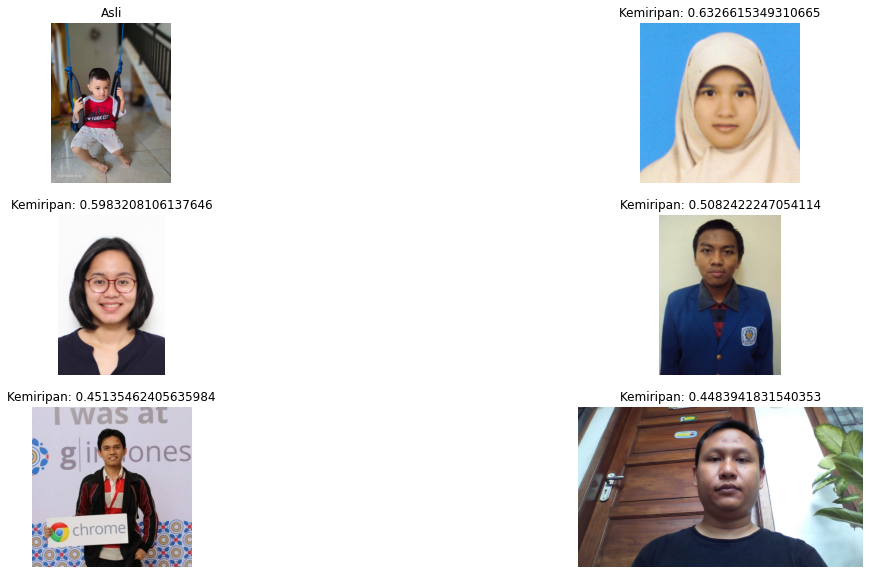

In [464]:
fig = plt.figure(figsize=(20,10))
fig.add_subplot(3,2,1)
img2 = plt.imread(img_path)
plt.title("Asli")
plt.imshow(img2)
plt.axis('off')
z = 2
for index, row in df.head().iterrows():
    fig.add_subplot(3,2,z)
    img2 = plt.imread(row['Photo'])
    plt.title(f"Kemiripan: {row['Prediksi'][0][0]}")
    plt.imshow(img2)
    plt.axis('off')
    z = z + 1

plt.show()